# Using TensorFlow

## Using NN to classification on MNIST


  

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
(x_train, y_train), (x_val, y_val) = keras.datasets.fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
def preprocess(x, y):
  x = tf.cast(x, tf.float32) / 255.0
  y = tf.cast(y, tf.int64)
  return x, y

def create_dataset(xs, ys, n_classes=10):
  ys = tf.one_hot(ys, depth=n_classes)
  return tf.data.Dataset.from_tensor_slices((xs, ys)) \
    .map(preprocess) \
    .shuffle(len(ys)) \
    .batch(128)

train_dataset = create_dataset(x_train, y_train)
val_dataset = create_dataset(x_val, y_val)

In [ ]:
model = keras.Sequential([
    keras.layers.Reshape(target_shape=(28 * 28,), input_shape=(28, 28)),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dense(units=192, activation='relu'),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])
model.compile(optimizer='adam',
              loss=tf.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(
    train_dataset.repeat(),
    epochs=10,
    steps_per_epoch=500,
    validation_data=val_dataset.repeat(),
    validation_steps=2
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


500/500 [==============================] - 7s 8ms/step - loss: 0.4942 - accuracy: 0.8255 - val_loss: 0.3335 - val_accuracy: 0.8711
Epoch 2/10
500/500 [==============================] - 5s 10ms/step - loss: 0.3583 - accuracy: 0.8687 - val_loss: 0.4353 - val_accuracy: 0.8477
Epoch 3/10
500/500 [==============================] - 4s 8ms/step - loss: 0.3227 - accuracy: 0.8820 - val_loss: 0.3389 - val_accuracy: 0.8828
Epoch 4/10
500/500 [==============================] - 4s 7ms/step - loss: 0.2995 - accuracy: 0.8881 - val_loss: 0.3904 - val_accuracy: 0.8594
Epoch 5/10
500/500 [==============================] - 4s 8ms/step - loss: 0.2748 - accuracy: 0.8976 - val_loss: 0.3724 - val_accuracy: 0.8672
Epoch 6/10
500/500 [==============================] - 5s 10ms/step - loss: 0.2655 - accuracy: 0.8999 - val_loss: 0.3634 - val_accuracy: 0.8672
Epoch 7/10
500/500 [==============================] - 4s 8ms/step - loss: 0.2523 - accuracy: 0.9041 - val_loss: 0.3652 - val_accuracy: 0.8594
Epoch 8/10
500/

In [ ]:
predictions = model.predict(val_dataset)
np.argmax(predictions)


## Using CNN to classify MNIST dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


# Grid Extraction for Suduko

## Trial numero uno

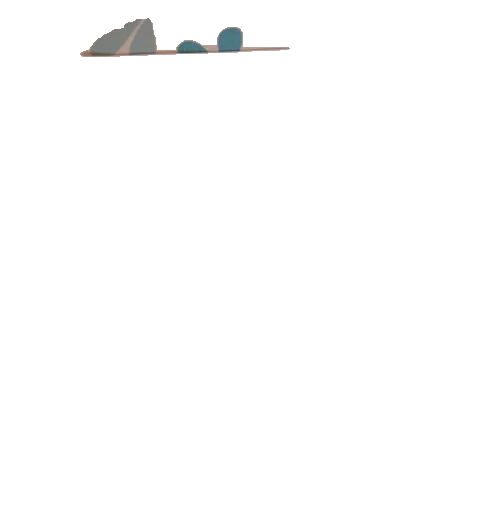

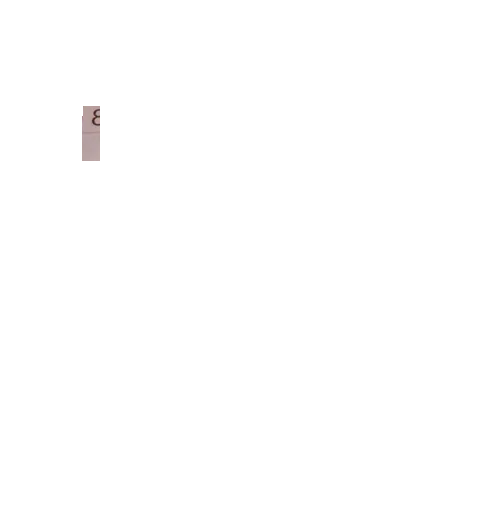

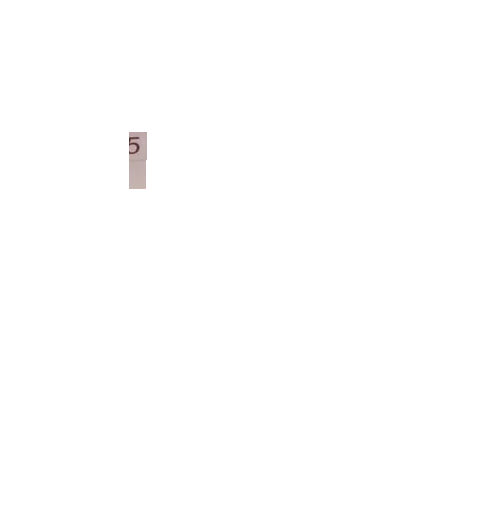

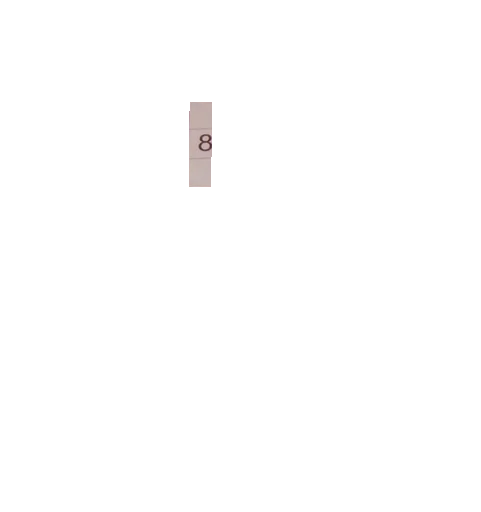

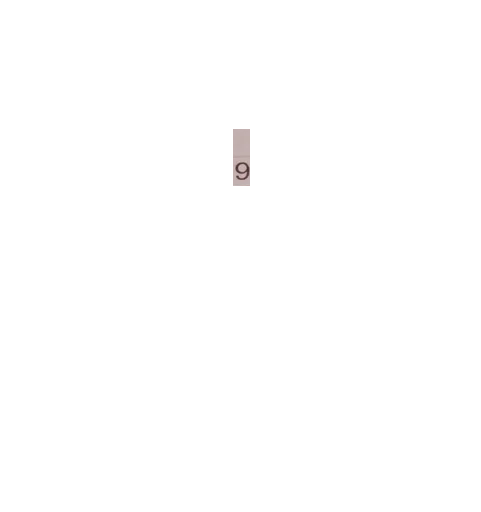

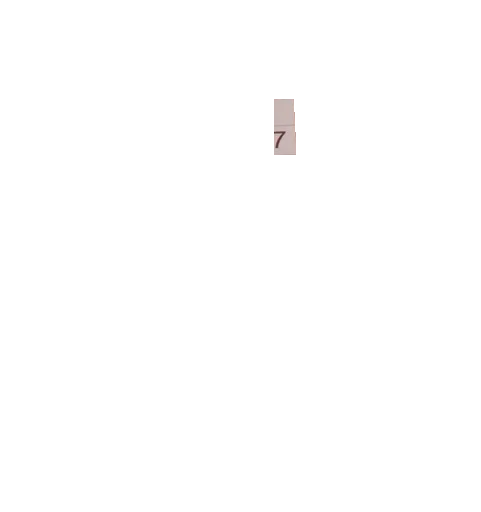

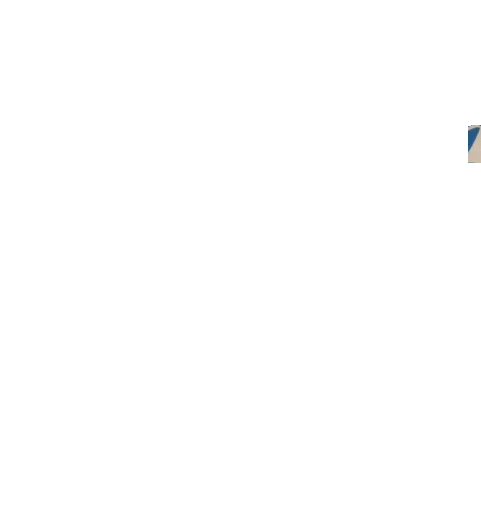

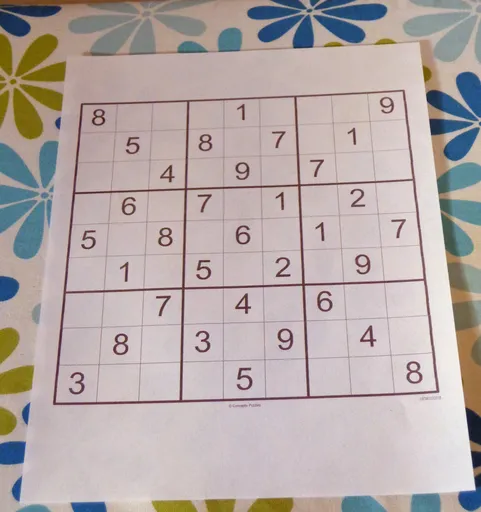

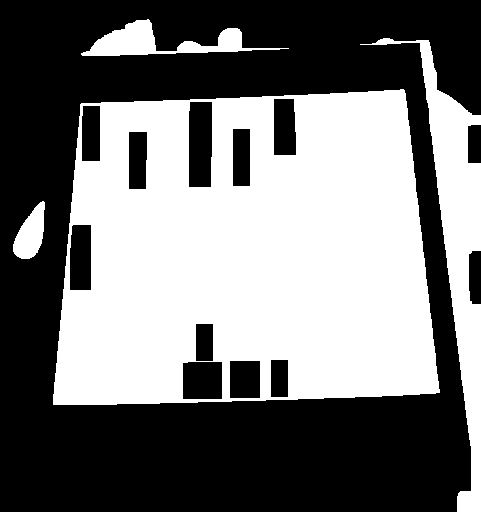

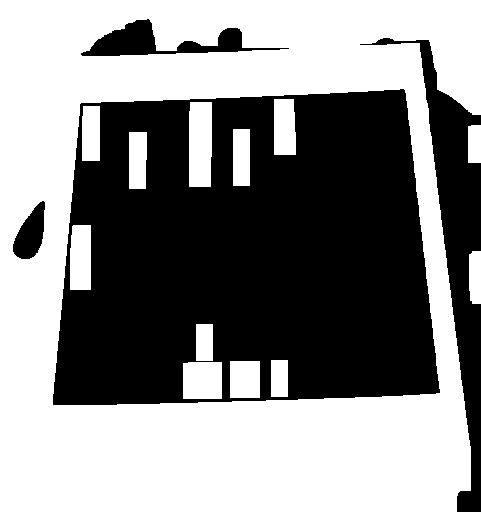

-1

In [ ]:
import cv2
from imutils import contours
import numpy as np
from google.colab.patches import cv2_imshow

# Load image, grayscale, and adaptive threshold
image = cv2.imread('/content/1.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,57,5)

# Filter out all numbers and noise to isolate only boxes
cnts = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    area = cv2.contourArea(c)
    if area < 1000:
        cv2.drawContours(thresh, [c], -1, (0,0,0), -1)

# Fix horizontal and vertical lines
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,5))
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, vertical_kernel, iterations=9)
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,1))
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, horizontal_kernel, iterations=4)

# Sort by top to bottom and each row by left to right
invert = 255 - thresh
cnts = cv2.findContours(invert, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
(cnts, _) = contours.sort_contours(cnts, method="top-to-bottom")

sudoku_rows = []
row = []
for (i, c) in enumerate(cnts, 1):
    area = cv2.contourArea(c)
    if area < 50000:
        row.append(c)
        if i % 9 == 0:
            (cnts, _) = contours.sort_contours(row, method="left-to-right")
            sudoku_rows.append(cnts)
            row = []

# Iterate through each box
for row in sudoku_rows:
    for c in row:
        mask = np.zeros(image.shape, dtype=np.uint8)
        cv2.drawContours(mask, [c], -1, (255,255,255), -1)
        result = cv2.bitwise_and(image, mask)
        result[mask==0] = 255
        cv2_imshow( result)
        cv2.waitKey(175)
cv2_imshow(image)
cv2_imshow( thresh)
cv2_imshow( invert)
cv2.waitKey()

## Code from GPT


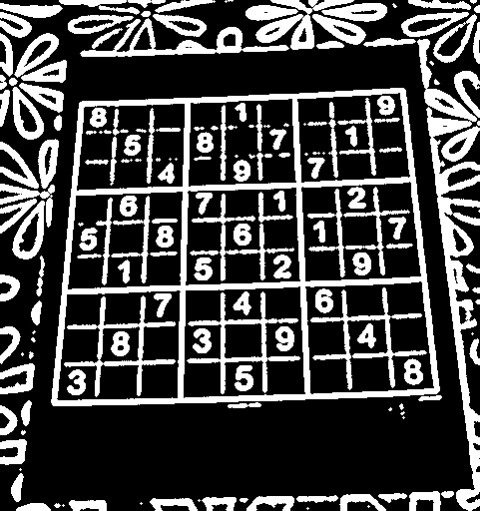

In [ ]:
import cv2
import numpy as np
import operator
from google.colab.patches import cv2_imshow

def distance_between(p1, p2):
    a = p2[0] - p1[0]
    b = p2[1] - p1[1]
    return np.sqrt((a ** 2) + (b ** 2))

# Load the Sudoku puzzle image and some pre processing
image_path = "/content/1.png"
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
proc = cv2.GaussianBlur(img.copy(), (9, 9), 0)
proc = cv2.adaptiveThreshold(proc, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

proc = cv2.bitwise_not(proc, proc)
kernel = np.array([[0., 1., 0.], [1., 1., 1.], [0., 1., 0.]],np.uint8)
proc = cv2.dilate(proc, kernel)



contours, hierarchy = cv2.findContours(img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)
polygon = contours[0]

# finding biggest bb
# bottom_right, _ = max(enumerate([pt[0][0] + pt[0][1] for pt in
#                       polygon]), key=operator.itemgetter(1))
# top_left, _ = min(enumerate([pt[0][0] + pt[0][1] for pt in
#                   polygon]), key=operator.itemgetter(1))
# bottom_left, _ = min(enumerate([pt[0][0] - pt[0][1] for pt in
#                      polygon]), key=operator.itemgetter(1))
# top_right, _ = max(enumerate([pt[0][0] - pt[0][1] for pt in
#                    polygon]), key=operator.itemgetter(1))


# top_left, top_right, bottom_right, bottom_left = crop_rect[0], crop_rect[1], crop_rect[2], crop_rect[3]
# src = np.array([top_left, top_right, bottom_right, bottom_left], dtype='float32')
# side = max([  distance_between(bottom_right, top_right),
#             distance_between(top_left, bottom_left),
#             distance_between(bottom_right, bottom_left),
#             distance_between(top_left, top_right) ])

def crop_and_warp(image, polygon):
    # Get the coordinates of the rectangle corners
    bottom_right, _ = max(enumerate([pt[0][0] + pt[0][1] for pt in polygon]), key=operator.itemgetter(1))
    top_left, _ = min(enumerate([pt[0][0] + pt[0][1] for pt in polygon]), key=operator.itemgetter(1))
    bottom_left, _ = min(enumerate([pt[0][0] - pt[0][1] for pt in polygon]), key=operator.itemgetter(1))
    top_right, _ = max(enumerate([pt[0][0] - pt[0][1] for pt in polygon]), key=operator.itemgetter(1))

    # Convert the corners to numpy arrays
    bottom_right = np.array(polygon[bottom_right][0])
    top_left = np.array(polygon[top_left][0])
    bottom_left = np.array(polygon[bottom_left][0])
    top_right = np.array(polygon[top_right][0])

    # Calculate the width and height of the rectangular section
    width = max(np.linalg.norm(bottom_right - bottom_left), np.linalg.norm(top_right - top_left))
    height = max(np.linalg.norm(top_right - bottom_right), np.linalg.norm(top_left - bottom_left))

    # Create destination points for the warp
    destination_points = np.array([[0, 0], [width - 1, 0], [width - 1, height - 1], [0, height - 1]], dtype="float32")

    # Calculate the perspective transform matrix
    matrix = cv2.getPerspectiveTransform(np.array([top_left, top_right, bottom_right, bottom_left], dtype="float32"), destination_points)

    # Apply the perspective transform
    warped_image = cv2.warpPerspective(image, matrix, (int(width), int(height)))

    return warped_image

warped_result = crop_and_warp(proc, polygon)
cv2_imshow(warped_result)
# Function to check if a contour contains a digit
def is_digit_contour(contour):
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = w / h
    if 0.5<= aspect_ratio :
        return True
    else:
        return False

# Filter contours that likely contain digits
digit_contours = [contour for contour in contours if is_digit_contour(contour)]

# Draw rectangles around the detected digit contours
highlighted_image = img.copy()
for contour in digit_contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(highlighted_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the original and highlighted images
# cv2_imshow(image)
# cv2_imshow(highlighted_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


## Code from online resources


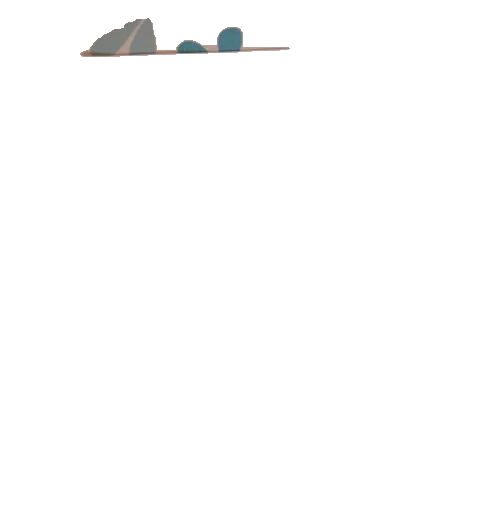

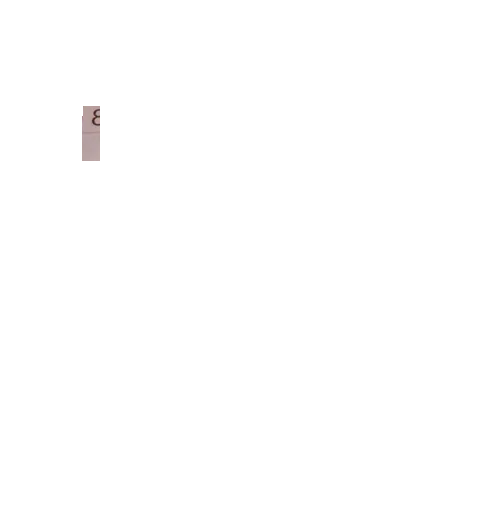

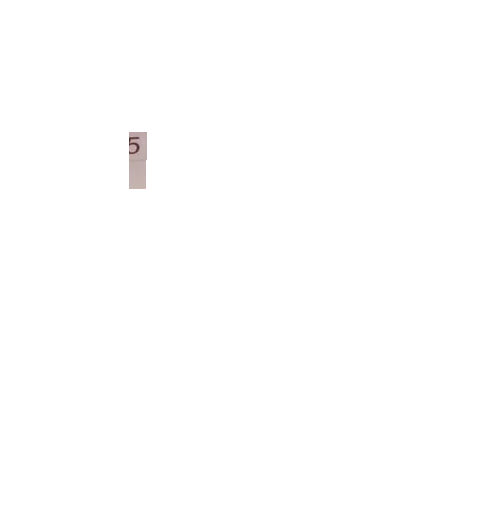

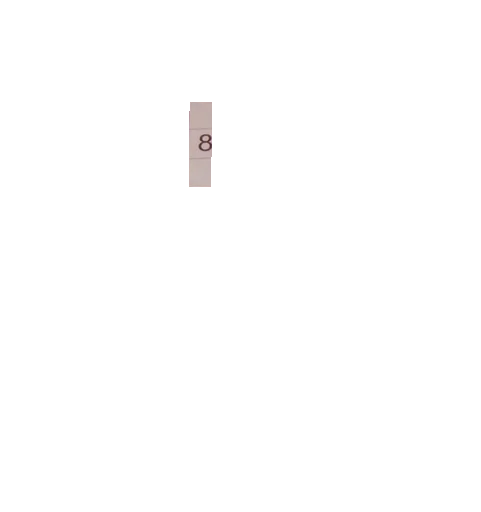

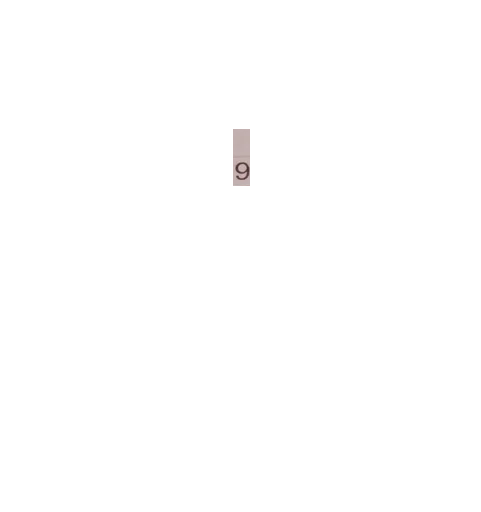

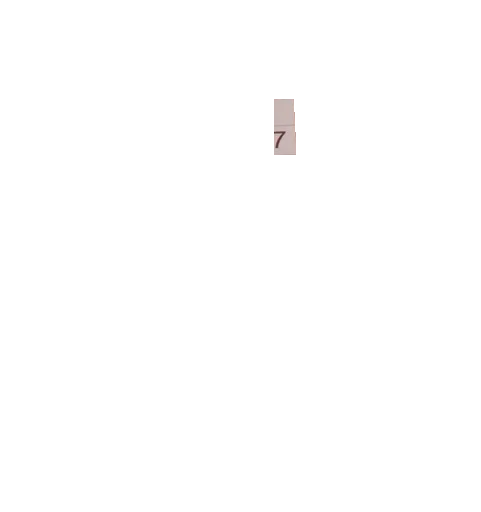

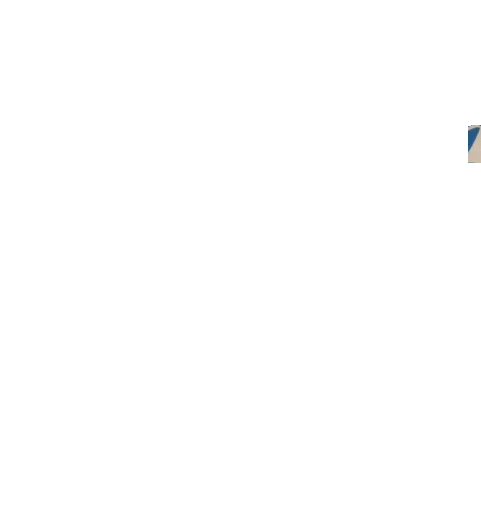

-1

In [ ]:
import cv2
from imutils import contours
import numpy as np
from google.colab.patches import cv2_imshow

# Load image, grayscale, and adaptive threshold
image = cv2.imread('/content/1.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,57,5)

# Filter out all numbers and noise to isolate only boxes
cnts = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    area = cv2.contourArea(c)
    if area < 1000:
        cv2.drawContours(thresh, [c], -1, (0,0,0), -1)

# Fix horizontal and vertical lines
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,5))
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, vertical_kernel, iterations=9)
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,1))
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, horizontal_kernel, iterations=4)

# Sort by top to bottom and each row by left to right
invert = 255 - thresh
cnts = cv2.findContours(invert, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
(cnts, _) = contours.sort_contours(cnts, method="top-to-bottom")

sudoku_rows = []
row = []
for (i, c) in enumerate(cnts, 1):
    area = cv2.contourArea(c)
    if area < 50000:
        row.append(c)
        if i % 9 == 0:
            (cnts, _) = contours.sort_contours(row, method="left-to-right")
            sudoku_rows.append(cnts)
            row = []

# Iterate through each box
for row in sudoku_rows:
    for c in row:
        mask = np.zeros(image.shape, dtype=np.uint8)
        cv2.drawContours(mask, [c], -1, (255,255,255), -1)
        result = cv2.bitwise_and(image, mask)
        result[mask==0] = 255
        cv2_imshow( result)
        cv2.waitKey(175)

# cv2.imshow( thresh)
# cv2.imshow( invert)
cv2.waitKey()

In [ ]:
# ==========import the necessary packages============
import imutils
import numpy as np
import cv2
from PIL import Image
import pytesseract
import math
from skimage.filters import threshold_local
from google.colab.patches import cv2_imshow

img = cv2.imread("/content/1.png")

# =============== For Transformation ==============

def order_points(pts):
    """initialzie a list of coordinates that will be ordered
    such that the first entry in the list is the top-left,
    the second entry is the top-right, the third is the
    bottom-right, and the fourth is the bottom-left"""

    rect = np.zeros((4, 2), dtype = "float32")

    # the top-left point will have the smallest sum, whereas
    # the bottom-right point will have the largest sum
    s = pts.sum(axis = 1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]

    # now, compute the difference between the points, the
    # top-right point will have the smallest difference,
    # whereas the bottom-left will have the largest difference
    diff = np.diff(pts, axis = 1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]

    # return the ordered coordinates
    return rect


def four_point_transform(image, pts):
    # obtain a consistent order of the points and unpack them
    # individually
    rect = order_points(pts)
    (tl, tr, br, bl) = rect

    # compute the width of the new image, which will be the
    # maximum distance between bottom-right and bottom-left
    # x-coordiates or the top-right and top-left x-coordinates
    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))

    # compute the height of the new image, which will be the
    # maximum distance between the top-right and bottom-right
    # y-coordinates or the top-left and bottom-left y-coordinates
    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))

    # now that we have the dimensions of the new image, construct
    # the set of destination points to obtain a "birds eye view",
    # (i.e. top-down view) of the image, again specifying points
    # in the top-left, top-right, bottom-right, and bottom-left
    # order
    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype = "float32")

    # compute the perspective transform matrix and then apply it
    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))

    # return the warped image
    return warped

############## To show image ##############
def show_image(img,title):
    cv2_imshow(img)


def find_largest_feature(inp_img, scan_tl=None, scan_br=None):
    """
    Uses the fact the `floodFill` function returns a bounding box of the area it filled to find the biggest
    connected pixel structure in the image. Fills this structure in white, reducing the rest to black.
    """
    img = inp_img.copy()  # Copy the image, leaving the original untouched
    height, width = img.shape[:2]

    max_area = 0
    seed_point = (None, None)

    if scan_tl is None:
        scan_tl = [0, 0]

    if scan_br is None:
        scan_br = [width, height]

    # Loop through the image
    for x in range(scan_tl[0], scan_br[0]):
        for y in range(scan_tl[1], scan_br[1]):
            # Only operate on light or white squares
            if img.item(y, x) == 255 and x < width and y < height:  # Note that .item() appears to take input as y, x
                area = cv2.floodFill(img, None, (x, y), 64)
                if area[0] > max_area:  # Gets the maximum bound area which should be the grid
                    max_area = area[0]
                    seed_point = (x, y)

    # Colour everything grey (compensates for features outside of our middle scanning range
    for x in range(width):
        for y in range(height):
            if img.item(y, x) == 255 and x < width and y < height:
                cv2.floodFill(img, None, (x, y), 64)

    mask = np.zeros((height + 2, width + 2), np.uint8)  # Mask that is 2 pixels bigger than the image

    # Highlight the main feature
    if all([p is not None for p in seed_point]):
        cv2.floodFill(img, mask, seed_point, 255)



    for x in range(width):
        for y in range(height):
            if img.item(y, x) == 64:  # Hide anything that isn't the main feature
                cv2.floodFill(img, mask, (x, y), 0)

    return img


################# Preprocessing of sudoku image ###############
def preprocess(image,case):
    ratio = image.shape[0] / 500.0
    orig = image.copy()
    image = imutils.resize(image, height = 500)

    if case == True:

        gray = cv2.GaussianBlur(image,(5,5),0)
        gray = cv2.cvtColor(gray,cv2.COLOR_BGR2GRAY)
        mask = np.zeros((gray.shape),np.uint8)
        kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))

        close = cv2.morphologyEx(gray,cv2.MORPH_CLOSE,kernel1)
        div = np.float32(gray)/(close)
        res = np.uint8(cv2.normalize(div,div,0,255,cv2.NORM_MINMAX))
        res2 = cv2.cvtColor(res,cv2.COLOR_GRAY2BGR)
        edged = cv2.Canny(res, 75, 200)

        cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
        cnts = cnts[0] if imutils.is_cv2() else cnts[1]
        cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:5]

        # loop over the contours
        for c in cnts:
            # approximate the contour
            rect = cv2.boundingRect(c)
            area = cv2.contourArea(c)

            cv2.rectangle(edged.copy(), (rect[0],rect[1]), (rect[2]+rect[0],rect[3]+rect[1]), (0,0,0), 2)
            peri = cv2.arcLength(c, True)
            approx = cv2.approxPolyDP(c, 0.02 * peri, True)

            # if our approximated contour has four points, then we
            # can assume that we have found our screen
            if len(approx) == 4:
                screenCnt = approx
                #print(screenCnt)
                break

        # show the contour (outline) of the piece of paper
        #print(screenCnt)
        cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 2)

        # apply the four point transform to obtain a top-down
        # view of the original image
        warped = four_point_transform(orig, screenCnt.reshape(4, 2) * ratio)
        warped1 = cv2.resize(warped,(610,610))
        warp = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
        T = threshold_local(warp, 11, offset = 10, method = "gaussian")
        warp = (warp > T).astype("uint8") * 255
        th3 = cv2.adaptiveThreshold(warp,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY_INV,11,2)
        kernel = np.ones((5,5),np.uint8)
        dilation =cv2.GaussianBlur(th3,(5,5),0)

    else :

        warped = image
        warped1 = cv2.resize(warped,(610,610))
        warp = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
        T = threshold_local(warp, 11, offset = 10, method = "gaussian")
        warp = (warp > T).astype("uint8") * 255
        th3 = cv2.adaptiveThreshold(warp,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY_INV,11,2)

    #show_image(warped1,"preprocessed")

    return th3,warped1,warped

def grids(img,warped2):
    #print("im:",img.shape)
    img2 = img.copy()
    img = np.zeros((500,500,3), np.uint8)

    ratio2 = 3
    kernel_size = 3
    lowThreshold = 30

    frame = img

    img = cv2.resize(frame,(610,610))

    for i in range(10):
        cv2.line(img, (0,(img.shape[0]//9)*i),(img.shape[1],(img.shape[0]//9)*i), (255, 255, 255), 3, 1)
        cv2.line(warped2, (0,(img.shape[0]//9)*i),(img.shape[1],(img.shape[0]//9)*i), (125, 0, 55), 3, 1)

    for j in range(10):
        cv2.line(img, ((img.shape[1]//9)*j, 0), ((img.shape[1]//9)*j, img.shape[0]), (255, 255, 255), 3, 1)
        cv2.line(warped2, ((img.shape[1]//9)*j, 0), ((img.shape[1]//9)*j, img.shape[0]), (125, 0, 55), 3, 1)

    #show_image(warped2,"grids")
    return img

############### Finding out the intersection pts to get the grids #########
def grid_points(img,warped2):
    img1 = img.copy()
    kernelx = cv2.getStructuringElement(cv2.MORPH_RECT,(2,10))

    dx = cv2.Sobel(img,cv2.CV_16S,1,0)
    dx = cv2.convertScaleAbs(dx)
    c=cv2.normalize(dx,dx,0,255,cv2.NORM_MINMAX)
    c = cv2.morphologyEx(c,cv2.MORPH_DILATE,kernelx,iterations = 1)
    cy = cv2.cvtColor(c,cv2.COLOR_BGR2GRAY)
    closex = cv2.morphologyEx(cy,cv2.MORPH_DILATE,kernelx,iterations = 1)

    kernely = cv2.getStructuringElement(cv2.MORPH_RECT,(10,2))
    dy = cv2.Sobel(img,cv2.CV_16S,0,2)
    dy = cv2.convertScaleAbs(dy)
    c = cv2.normalize(dy,dy,0,255,cv2.NORM_MINMAX)
    c = cv2.morphologyEx(c,cv2.MORPH_DILATE,kernely,iterations = 1)
    cy = cv2.cvtColor(c,cv2.COLOR_BGR2GRAY)
    closey = cv2.morphologyEx(cy,cv2.MORPH_DILATE,kernelx,iterations = 1)

    res = cv2.bitwise_and(closex,closey)
    #gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(res,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    kernel = np.ones((6,6),np.uint8)


    # Perform morphology
    se = np.ones((8,8), dtype='uint8')
    image_close = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, se)
    image_close = cv2.morphologyEx(image_close, cv2.MORPH_OPEN, kernel)

    contour, hier = cv2.findContours        (image_close,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
    cnts = sorted(contour, key=cv2.contourArea, reverse=True)[:100]
    centroids = []
    for cnt in cnts:

        mom = cv2.moments(cnt)
        (x,y) = int(mom['m10']/mom['m00']), int(mom['m01']/mom['m00'])
        cv2.circle(img1,(x,y),4,(0,255,0),-1)
        cv2.circle(warped2,(x,y),4,(0,255,0),-1)
        centroids.append((x,y))

    #show_image(warped2,"grid_points")


    Points = np.array(centroids,dtype = np.float32)
    c = Points.reshape((100,2))
    c2 = c[np.argsort(c[:,1])]

    b = np.vstack([c2[i*10:(i+1)*10][np.argsort(c2[i*10:(i+1)*10,0])] for i in range(10)])
    bm = b.reshape((10,10,2))

    return c2,bm,cnts

############ Recognize digit images to number #############
def image_to_num(c2):
    img = 255-c2
    text = pytesseract.image_to_string(img, lang="eng",config='--psm 6 --oem 3') #builder=builder)
    return list(text)[0]

###### To get the digit at the particular cell #############
def get_digit(c2,bm,warped1,cnts):
    num = []
    centroidx = np.empty((9, 9))
    centroidy = np.empty((9, 9))
    global list_images
    list_images = []
    for i in range(0,9):
        for j in range(0,9):

            x1,y1 = bm[i][j] # bm[0] row1
            x2,y2 = bm[i+1][j+1]

            coordx = ((x1+x2)//2)
            coordy = ((y1+y2)//2)
            centroidx[i][j] = coordx
            centroidy[i][j] = coordy
            crop = warped1[int(x1):int(x2),int(y1):int(y2)]
            crop = imutils.resize(crop, height=69,width=67)
            c2 = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
            c2 = cv2.adaptiveThreshold(c2,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
                cv2.THRESH_BINARY_INV,11,2)
            kernel = np.ones((2,2),np.uint8)
            #c2 = cv2.morphologyEx(c2, cv2.MORPH_OPEN, kernel)
            c2= cv2.copyMakeBorder(c2,5,5,5,5,cv2.BORDER_CONSTANT,value=(0,0,0))
            no = 0
            shape=c2.shape
            w=shape[1]
            h=shape[0]
            mom = cv2.moments(c2)
            (x,y) = int(mom['m10']/mom['m00']), int(mom['m01']/mom['m00'])
            c2 = c2[14:70,15:62]
            contour, hier = cv2.findContours (c2,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
            if cnts is not None:
                cnts = sorted(contour, key=cv2.contourArea,reverse=True)[:1]

            for cnt in cnts:
                x,y,w,h = cv2.boundingRect(cnt)
                aspect_ratio = w/h
#               print(aspect_ratio)
                area = cv2.contourArea(cnt)
                #print(area)
                if area>120 and cnt.shape[0]>15 and aspect_ratio>0.2 and aspect_ratio<=0.9 :
                    #print("area:",area)
                    c2 = find_largest_feature(c2)
                    #show_image(c2,"box2")
                    contour, hier = cv2.findContours (c2,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
                    cnts = sorted(contour, key=cv2.contourArea,reverse=True)[:1]
                    for cnt in cnts:
                        rect = cv2.boundingRect(cnt)
                        #cv2.rectangle(c2, (rect[0],rect[1]), (rect[2]+rect[0],rect[3]+rect[1]), (255,255,255), 2)
                        c2 = c2[rect[1]:rect[3]+rect[1],rect[0]:rect[2]+rect[0]]
                        c2= cv2.copyMakeBorder(c2,5,5,5,5,cv2.BORDER_CONSTANT,value=(0,0,0))
                        list_images.append(c2)
                    #show_image(c2,"box")
                    no = image_to_num(c2)
            num.append(no)
    centroidx = np.transpose(centroidx)
    centroidy = np.transpose(centroidy)
    return c2, num, centroidx, centroidy

######## creating matrix and filling numbers exist in the orig image #######
def sudoku_matrix(num):
    c = 0
    grid = np.empty((9, 9))
    for i in range(9):
        for j in range(9):
            grid[i][j] = int(num[c])

            c += 1
    grid = np.transpose(grid)
    return grid

######## Creating board to show the puzzle result in terminal##############
def board(arr):
    for i in range(9):

        if i%3==0 :
                print("+",end="")
                print("-------+"*3)

        for j in range(9):
            if j%3 ==0 :
                print("",end="| ")
            print(int(arr[i][j]),end=" ")

        print("",end="|")
        print()

    print("+",end="")
    print("-------+"*3)
    return arr

def check_col(arr,num,col):
    if  all([num != arr[i][col] for i in range(9)]):
        return True
    return False


def check_row(arr,num,row):
    if  all([num != arr[row][i] for i in range(9)]):
        return True
    return False


def check_cell(arr,num,row,col):
    sectopx = 3 * (row//3)
    sectopy = 3 * (col//3)

    for i in range(sectopx, sectopx+3):
        for j in range(sectopy, sectopy+3):
            if arr[i][j] == num:
                return True
    return False


def empty_loc(arr,l):
    for i in range(9):
        for j in range(9):
            if arr[i][j] == 0:
                l[0]=i
                l[1]=j
                return True
    return False

#### Solving sudoku by back tracking############
def sudoku(arr):
    l=[0,0]

    if not empty_loc(arr,l):
        return True

    row = l[0]
    col = l[1]

    for num in range(1,10):
        if check_row(arr,num,row) and check_col(arr,num,col) and not check_cell(arr,num,row,col):
            arr[row][col] = int(num)

            if(sudoku(arr)):
                return True

            # failure, unmake & try again
            arr[row][col] = 0

    return False

def overlay(arr,num,img,cx,cy):
    no = -1
    for i in range(9):
        for j in range(9):
            no += 1
            #cv2.putText(img,str(no), (int(cx[i][j]),int(cy[i][j])),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
            if num[no] == 0:

                cv2.putText(img,str(int(arr[j][i])), (int(cx[i][j]-4),int(cy[i][j])+8),cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4)

    cv2_imshow(img)
    cv2.waitKey(0)

th3,warped1,warped = preprocess(img, 0)
warped2 = warped1.copy()
img = grids(warped,warped2)
c2,bm,cnts = grid_points(img,warped2)
c2,num,cx,cy = get_digit(c2,bm,warped1,cnts)
grid = sudoku_matrix(num)
if(sudoku(grid)):
    arr = board(grid)
    overlay(arr,num,warped1,cx,cy)

else:
    print("There is no solution")

TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.

# New section

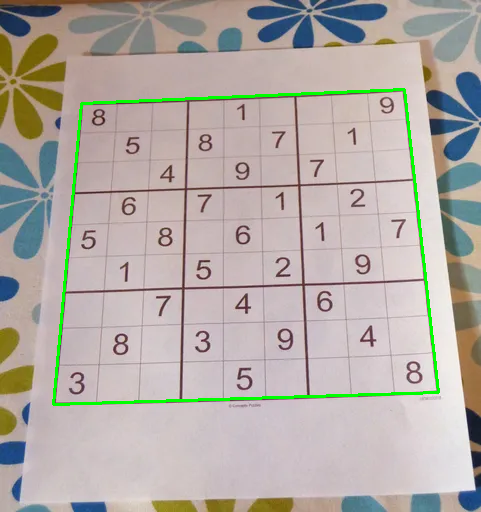

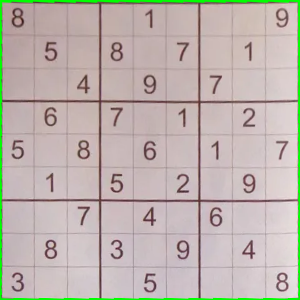

ValueError: incorrect number of indices for array

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def find_corners(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 50, 150)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the largest contour, assuming it's the Sudoku puzzle
    largest_contour = max(contours, key=cv2.contourArea)

    # Approximate the contour to a polygon (rectangle)
    epsilon = 0.02 * cv2.arcLength(largest_contour, True)
    polygon = cv2.approxPolyDP(largest_contour, epsilon, True)

    return polygon

def crop_and_warp(image, corners):
    destination_points = np.array([[0, 0], [300 - 1, 0], [300 - 1, 300 - 1], [0, 300 - 1]], dtype="float32")
    corners = np.array(corners, dtype="float32")
    matrix = cv2.getPerspectiveTransform(corners, destination_points)
    warped_image = cv2.warpPerspective(image, matrix, (300, 300))

    return warped_image

def inferGrid(img):
    squares = []
    side = img.shape[:1]
    side = side[0] / 9
    for j in range(9):
        for i in range(9):
            p1 = (i * side, j * side)  #Top left corner of a box
            p2 = ((i + 1) * side, (j + 1) * side)  #Bottom right corner
            squares.append((p1, p2))
    return squares

def cut_from_rect(img, rect):
    return img[int(rect[0][1]):int(rect[1][1]), int(rect[0][0]):int(rect[1][0])]

def scale_and_centre(img, size, margin=0, background=0):
    h, w = img.shape[:2]

    def centre_pad(length):
        if length % 2 == 0:
            side1 = int((size - length) / 2)
            side2 = side1
        else:
            side1 = int((size - length) / 2)
            side2 = side1 + 1
        return side1, side2

    def scale(r, x):
        return int(r * x)

    if h > w:
        t_pad = int(margin / 2)
        b_pad = t_pad
        ratio = (size - margin) / h
        w, h = scale(ratio, w), scale(ratio, h)
        l_pad, r_pad = centre_pad(w)
    else:
        l_pad = int(margin / 2)
        r_pad = l_pad
        ratio = (size - margin) / w
        w, h = scale(ratio, w), scale(ratio, h)
        t_pad, b_pad = centre_pad(h)

    img = cv2.resize(img, (w, h))
    img = cv2.copyMakeBorder(img, t_pad, b_pad, l_pad, r_pad, cv2.BORDER_CONSTANT, None, background)
    return cv2.resize(img, (size, size))

def find_largest_feature(inp_img, scan_tl=None, scan_br=None):

    img = inp_img.copy()  # Copy the image, leaving the original untouched
    height, width = img.shape[:2]

    max_area = 0
    seed_point = (None, None)

    if scan_tl is None:
      scan_tl = [0, 0]

    if scan_br is None:
       scan_br = [width, height]

    # Loop through the image
    for x in range(scan_tl[0], scan_br[0]):
        for y in range(scan_tl[1], scan_br[1]):
        # Only operate on light or white squares
            if img.item(y, x) == 255:
                area = cv2.floodFill(img, None, (x, y), 64)
                if area[0] > max_area:
                    # Gets the maximum bound area which should be the grid
                    max_area = area[0]
                    seed_point = (x, y)

    # Colour everything grey (compensates for features outside of our middle scanning range
    for x in range(width):
        for y in range(height):
            if img.item(y, x) == 255:
                cv2.floodFill(img, None, (x, y), 64)

    mask = np.zeros((height + 2, width + 2), np.uint8)  # Mask that is 2 pixels bigger than the image

    # Highlight the main feature
    if all([p is not None for p in seed_point]):
        cv2.floodFill(img, mask, seed_point, 255)

    top, bottom, left, right = height, 0, width, 0

    for x in range(width):
        for y in range(height):
            if img.item(y, x) == 64:  # Hide anything that isn't the main feature
               cv2.floodFill(img, mask, (x, y), 0)

        # Find the bounding parameters
        if img.item(y, x) == 255:
            top = y if y < top else top
            bottom = y if y > bottom else bottom
            left = x if x < left else left
            right = x if x > right else right

    bbox = [[left, top], [right, bottom]]
    return img, np.array(bbox, dtype='float32'), seed_point


def extract_digit(img, rect, size):
    digit = cut_from_rect(img, rect)
    h, w = digit.shape[:2]
    margin = int(np.mean([h, w]) / 2.5)
    _, bbox, seed = find_largest_feature(digit, [margin, margin], [w- margin, h - margin])
    digit = cut_from_rect(digit, bbox)

    w = bbox[1][0] - bbox[0][0]
    h = bbox[1][1] - bbox[0][1]

    if w > 0 and h > 0 and (w * h) > 100 and len(digit) > 0:
        return scale_and_centre(digit, size, 4)
    else:
        return np.zeros((size, size), np.uint8)

# Load the Sudoku puzzle image
image_path = "/content/1.png"
image = cv2.imread(image_path)

# Find and draw the corners
corners = find_corners(image)
cv2.drawContours(image, [corners], -1, (0, 255, 0), 2)

# Crop and warp the image using the defined corners
warped_result = crop_and_warp(image, corners)
flipped_image = cv2.flip(warped_result, 1)

# Display the original image with the detected contour and the warped image
cv2_imshow(image)
cv2_imshow(flipped_image)
squares = inferGrid(flipped_image)
size = 28
digits = []
for square in squares:
    digits.append(extract_digit(flipped_image, square, size))

